<a href="https://colab.research.google.com/github/abhishekmishra-bareilly/Deep-Learning/blob/main/Batch_vs_stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the dependancyes
import pandas as pd
import numpy as np

## Data overview

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/learn outside/Social_Network_Ads.csv')

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Feature engineering

In [11]:
x = data.drop(columns = ['User ID','Gender','Purchased'])
y = data['Purchased']

In [12]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [13]:
# Using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
x_scal = scaler.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scal,y,test_size=0.2,random_state=2)

## Applying ANN model

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [22]:
# Check for model summery
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(x_train,y_train,epochs=400,batch_size=1,validation_split=0.2)
#print(time.time() - start)

Epoch 1/400
256/256 [==============================] - 1s 3ms/step - loss: 0.2617 - accuracy: 0.9258 - val_loss: 0.2136 - val_accuracy: 0.9219
Epoch 2/400
256/256 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.9219 - val_loss: 0.2233 - val_accuracy: 0.9219
Epoch 3/400
256/256 [==============================] - 1s 2ms/step - loss: 0.2581 - accuracy: 0.9258 - val_loss: 0.2451 - val_accuracy: 0.9219
Epoch 4/400
256/256 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.9258 - val_loss: 0.2437 - val_accuracy: 0.9219
Epoch 5/400
256/256 [==============================] - 1s 2ms/step - loss: 0.2607 - accuracy: 0.9297 - val_loss: 0.2400 - val_accuracy: 0.9219
Epoch 6/400
256/256 [==============================] - 1s 2ms/step - loss: 0.2587 - accuracy: 0.9297 - val_loss: 0.2239 - val_accuracy: 0.9219
Epoch 7/400
256/256 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.9258 - val_loss: 0.2383 - val_accuracy: 0.9219

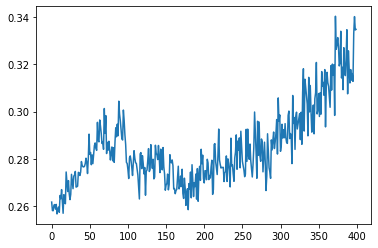

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [ ]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
#start = time.time()
history = model.fit(x_train,y_train,epochs=10,batch_size=250,validation_split=0.2)
#print(time.time() - start)

Epoch 1/10
2/2 [==============================] - 1s 166ms/step - loss: 0.3205 - accuracy: 0.9297 - val_loss: 0.2519 - val_accuracy: 0.9062
Epoch 2/10
2/2 [==============================] - 0s 24ms/step - loss: 0.3073 - accuracy: 0.9297 - val_loss: 0.2667 - val_accuracy: 0.9062
Epoch 3/10
2/2 [==============================] - 0s 25ms/step - loss: 0.2977 - accuracy: 0.9336 - val_loss: 0.2566 - val_accuracy: 0.9062
Epoch 4/10
2/2 [==============================] - 0s 29ms/step - loss: 0.2913 - accuracy: 0.9336 - val_loss: 0.2570 - val_accuracy: 0.9062
Epoch 5/10
2/2 [==============================] - 0s 25ms/step - loss: 0.2898 - accuracy: 0.9336 - val_loss: 0.2583 - val_accuracy: 0.9062
Epoch 6/10
2/2 [==============================] - 0s 26ms/step - loss: 0.2892 - accuracy: 0.9336 - val_loss: 0.2551 - val_accuracy: 0.9062
Epoch 7/10
2/2 [==============================] - 0s 29ms/step - loss: 0.2886 - accuracy: 0.9336 - val_loss: 0.2525 - val_accuracy: 0.9062
Epoch 8/10
2/2 [==========

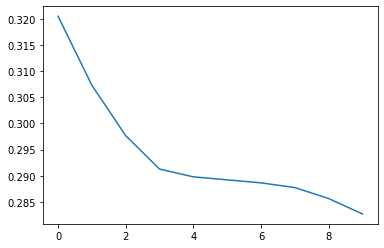

In [29]:
plt.plot(history.history['loss'])

In [ ]:
y_pred = model.predict(x_test)


In [35]:
final_pred = np.where(y_pred>0.5,1,0)

# check the accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_pred)

0.9125